# 4.4 使用数组进行文件输入和输出

np.save和np.load是高效存取硬盘数据的两大工具函数。数据在默认情况下是以未压缩的格式进行存储的，后缀名是.npy。

In [2]:
import numpy as np

In [3]:
arr = np.arange(10)

In [4]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
np.save('some_array', arr)

In [6]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

使用np.savez并将数组作为参数传递给该函数，用于在未压缩的文件中保存多个数组。

In [7]:
np.savez('array_archive.npz', a=arr, b=arr)

当载入一个.npy文件的时候，你会获得一个字典型的对象，并通过该对象很方便地载入单个数组：

In [10]:
arch = np.load('array_archive.npz')

In [11]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

如果你的数据已经压缩好了，你可能想要使用numpy.savez_compressed将数据存入已经压缩的文件。

In [12]:
np.savez_compressed('array_compressed.npz', a=arr, b=arr)

# 4.5 线性代数

**和matlab等其他语言相比，NumPy的线性代数中所不同的是,\*是矩阵的逐元素乘积，而不是矩阵的点乘积**   
因此，NumPy的数组方法和NumPy的命名空间中都有一个函数dot，用于矩阵的操作。

In [13]:
x = np.array([[1,2,3], [4,5,6]])

In [14]:
y = np.array([[6, 23], [-1, 7], [8,9]])

In [15]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [17]:
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

In [19]:
# x.dot(y)相当于np.dot(x,y)
np.dot(x, y)

array([[ 28,  64],
       [ 67, 181]])

In [20]:
# 一个二维数组和一个长度合适的一维数组之间的矩阵乘机，其结果是一个一维数组：
np.dot(x, np.ones(3))

array([ 6., 15.])

numpy.linalg拥有一个矩阵分解的标准函数集，以及其他常用函数，例如求逆和行列式求解。这些函数都是通过在MATLAB和R等其他语言使用的相同的行业标准线性代数库来实现的，例如BLAS、LAPACK或英特尔专有的MKL(数学核心库)(是否使用MKL取决于使用NumPy的版本)

In [28]:
from numpy.linalg import inv,qr

In [39]:
X = np.random.randn(5, 5)

In [40]:
mat = X.T.dot(X)

In [41]:
inv(mat)

array([[ 268.87767828, -334.92406312,  -61.93222978, -431.06292342,
         -79.05517301],
       [-334.92406312,  417.64495806,   77.12698262,  537.53191893,
          98.45756351],
       [ -61.93222978,   77.12698262,   16.58916004,   97.12935059,
          17.90041276],
       [-431.06292342,  537.53191893,   97.12935059,  694.17642192,
         126.94709423],
       [ -79.05517301,   98.45756351,   17.90041276,  126.94709423,
          23.52726389]])

In [42]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  4.67144314e-14,  1.67883896e-14,
        -4.11211026e-14, -5.86833003e-14],
       [ 1.23796316e-13,  1.00000000e+00, -6.69848157e-14,
         1.35675111e-13, -1.04173015e-13],
       [ 4.81819650e-14, -3.66000089e-13,  1.00000000e+00,
        -1.71820600e-13, -4.47161354e-14],
       [ 1.33139482e-13, -4.31558498e-13, -1.74616800e-14,
         1.00000000e+00, -7.86519328e-14],
       [-3.91591016e-14, -2.03174176e-15,  1.62808949e-14,
        -6.04524026e-14,  1.00000000e+00]])

In [43]:
q, r = qr(mat)

In [44]:
r

array([[-5.23914038e+00, -1.92588701e+00, -1.52142825e+00,
        -9.78913266e-01, -3.11969292e+00],
       [ 0.00000000e+00, -7.97395115e+00,  5.13291286e+00,
         5.09547567e+00,  1.97727123e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.51322814e-01,
        -2.51530178e-01,  1.64606485e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.97291237e-01,  2.71575344e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.51040438e-03]])

# 4.6 伪随机数生成

numpy.random模块填补了Python内建的random模块的不足，可以高效地生成多种概率分布下的完整样本值数组。  
例如，你可以使用normal来获得一个4x4的正态分布样本数组：

In [45]:
samples = np.random.normal(size=(4, 4))

In [46]:
samples

array([[-2.06503331, -0.41224082,  0.79682993,  1.40046192],
       [-1.53865401, -1.02759052,  1.38907143,  0.3987266 ],
       [ 0.22532954, -0.58712098, -0.51459322, -1.57919526],
       [-0.75704778, -0.05987697, -1.35508964,  0.19767896]])

然后Python内建的random模块一次只能生成一个值，你可以从下面的示例中看到，numpy.random在生成大型样本时比纯Python的方式快了一个数量级。

In [47]:
from random import normalvariate

In [48]:
N = 1000000

In [49]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1.63 s ± 98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%timeit np.random.normal(size=N)

48.7 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


我们可以称这些为伪随机数，因为它们是由具有确定性行为的算法根据随机数生成器中的随机数种子生成。可以通过np.random.seed更改NumPy的随机数种子。

In [52]:
np.random.seed(1234)

numpy.random中的数据生成函数使用一个全局随机数种子。为了避免全局状态，你可以使用numpy.random.RandomState创建一个随机数生成器，使数据独立于其他的随机数状态：

In [53]:
rng = np.random.RandomState(1234)

In [54]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# 4.7 示例：随机漫步

使用内建random模块利用纯Python实现一个1000步的随机漫步：

In [61]:
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

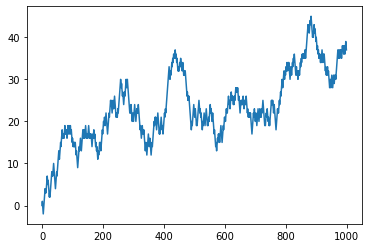

In [62]:
plt.plot(walk[:1000])

In [63]:
nsteps = 1000

In [64]:
draws = np.random.randint(0, 2, size=nsteps) # 生成大于等于0，小于等于2的随机整数，步数为1000

In [65]:
steps = np.where(draws > 0, 1, -1)

In [68]:
walk = steps.cumsum()

In [69]:
walk.min()

-9

In [70]:
walk.max()

60

更复杂的统计是第一次穿越时间，即随机漫步的某一步达到了某个特定值。这里假设我们想要知道漫步中是如何连续朝着某方向连续走了10步。np.abs(walk)>10给我们一个布尔值数组，用以表明漫步是否连续朝着同一方向走了十步，但是我们想要的是第一次走了10步或-10步的位置。我们可以是哦那个argmax来计算，该函数可以返回布尔值数组中最大值的第一个位置(True就是最大值)。

In [71]:
(np.abs(walk)>=10).argmax()

297

## 4.7.1 一次性模拟多次随机漫步

如果传入一个2个元素的元组，numpy.random中的函数可以生成一个二维的抽取数组，并且我们可以一次性地跨行算出全部5000个随机漫步的累计和。

In [75]:
nwalks = 5000

In [76]:
nsteps = 1000

In [77]:
draws = np.random.randint(0,2, size=(nwalks, nsteps))

In [78]:
steps = np.where(draws>0, 1, -1)

In [79]:
walks = steps.cumsum(1)

In [80]:
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

In [81]:
walks.max()

122

In [82]:
walks.min()

-128

In [84]:
hits30 = (np.abs(walks)>=30).any(1)

In [85]:
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [86]:
hits30.sum()

3368

In [87]:
crossing_times = (np.abs(walks[hits30])>30).argmax(1)

In [88]:
crossing_times.mean()

495.1543942992874